# SQL (sub-project)

## Description

The coronavirus took the entire world by surprise, changing everyone's daily routine. City dwellers no longer spent their free time outside, going to cafes and malls; more people were at home, reading books. That attracted the attention of startups that rushed to develop new apps for book lovers. 

You've been given a database of one of the services competing in this market. It contains data on books, publishers, authors, and customer ratings and reviews of books. This information will be used to generate a value proposition for a new product.

## Goal
This information will be used to generate a value proposition for a new product. 

## Task

- Find the number of books released after January 1, 2000.
- Find the number of user reviews and the average rating for each book.
- Identify the publisher that has released the greatest number of books with more than 50 pages (this will help you exclude brochures and similar publications from your analysis).
- Identify the author with the highest average book rating (look only at books with at least 50 ratings).
- Find the average number of text reviews among users who rated more than 50 books.

<script>
document.body.style.display = "none"; 
document.createElement("markdown");
var md_tags = document.getElementsByTagName("markdown"); 

for (var i = 0; i < md_tags.length; i++) { 
    var md_text = md_tags[i].textContent.replace(/^[^\S\n]+/mg, ""); 
    var md_div = document.createElement("div"); 
    md_div.id = "content";
    md_div.innerHTML = marked(md_text);
    md_tags[i].parentNode.appendChild(md_div); 
    md_tags[i].parentNode.removeChild(md_tags[i]);
}
document.body.style.display = ""; 
</script>
<style>
.row:after {
  content: "";
  display: table;
  clear: both;
}
 </style>
   <h2 style="padding-left:350px;">Data Description</h2>
   <hr>
<div class="row">
<div class='markdown' style='float:left;width:50%'>

**`books`**

Contains data on books:

- `book_id`
- `author_id`
- `title`
- `num_pages` — number of pages
- `publication_date`
- `publisher_id`


**`ratings`**

Contains data on user ratings:

- `rating_id`
- `book_id`
- `username` — the name of the user who rated the book
- `rating`
</div>
<div class='markdown' style='float:left;width:50%'>

**`authors`**

Contains data on authors:

- `author_id`
- `author`

**`publishers`**

Contains data on publishers: 
- `publisher_id`
- `publisher`

**`reviews`**

Contains data on customer reviews:

- `review_id`
- `book_id`
- `username` — the name of the user who reviewed the book
- `text` — the text of the review
</div>
</div>

## Commonly Used Functions

In [2]:
def modifyChartBasic(ax,title,labelSize,xLabel='',yLabel='',
                titleSize=False):
    """
    Function that takes in graph variables for the purpose of customizing basic 
    default settings (ie. setting label size)
    """
    if titleSize != False:
        ax.set_title(title,fontsize=titleSize,fontweight='semibold', pad=10)
    else:
        ax.set_title(title)

    # spines
    sns.despine()
    ax.spines['bottom'].set_color('gray')
    ax.spines['left'].set_color('lightgrey')

    # labels
    ax.set_ylabel(yLabel, labelpad=5, fontsize=16)
    ax.set_xlabel(xLabel, labelpad=5, fontsize=16)

    # tick settings
    ax.tick_params(labelsize=labelSize)
    ax.tick_params(axis='both', left=False, bottom=False)

In [3]:
def modifyChartExtra(ax,maxs=False,grid=False,highlightTop =False,
                 highlightXVal=False, topValueColor=False,grayTickLabels=False,topChild=None):
    """
    Main Function used to create extra modifications to chart. 
    """
    if grid:
        ax.grid(axis=grid, alpha=.4)
    if maxs:
        modifyMaxYTick(ax,maxs,highlightTop)
    if topValueColor:
        modifyMaxValueColor(ax,topValueColor,topChild)
     # changing size and color of tick labels (ticks are set to 0 to not display)   
    ax.tick_params(labelsize=15, size=0, labelcolor='#8a8a8d' if grayTickLabels else 'black')
    if highlightTop:
        ax.get_yticklabels()[-1].set_color('black')
    if highlightXVal:
        # get first x ticklabel and set color to black
        ax.get_xticklabels()[0].set_color('black')
        

In [4]:
def modifyMaxYTick(ax, maxValue,highlightTop):
    """
    Function that modifies y-scale to have the top y-tick label represent the maximum value
    whilst 'preventing' overlap between the last and second to last tick labels 
    """  
    # keep all except last  tick - ensure that the ticks don't overlap
    midCenterQuarter = (ax.get_yticks()[1] - ax.get_yticks()[0]) / 4

    ax.set_ylim(0, maxValue)  # set the yticks
    # add the last tick value
    y_ticks = np.append(
        [i for i in ax.get_yticks() if i < (maxValue - midCenterQuarter)], [maxValue])
    # set the modified y ticks
    ax.set_yticks(y_ticks)

In [5]:
def modifyMaxValueColor(ax,topValueColor,topChild):
    """
    Function that modifies the color of the first child artist 
    (here meant to represent the rectangle artist that maps to the top value; if values in descending order and a bar graph)
    of the main artist object
    """  
    if topChild is None:
        topChild = ax.get_children()[0]
    topChild.set_color(topValueColor)
    topChild.set_alpha(.8)

In [34]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

# Libraries Used

In [6]:
# import libraries
import pandas as pd
from sqlalchemy import create_engine
import os
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
db_config = {'user': 'praktikum_student',         # user name
             'pwd': 'Sdf4$2;d-d30pp', # password
             'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
             'port': 6432,              # connection port
             'db': 'data-analyst-final-project-db'}          # the name of the data base

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                                     db_config['pwd'],
                                                                       db_config['host'],
                                                                       db_config['port'],
                                                                       db_config['db'])

engine = create_engine(connection_string, connect_args={'sslmode':'require'})


In [10]:
def executeQuery(query, con=engine):
    return pd.read_sql(query, con)

In [17]:
tables = ['books','authors', 'publishers','ratings','reviews']

In [31]:
[print(table, 'count:',executeQuery(f'SELECT COUNT(*) FROM {table}')['count'][0]) for table in tables]

books count: 1000
authors count: 636
publishers count: 340
ratings count: 6456
reviews count: 2793


[None, None, None, None, None]

In [41]:
[(print(table),display_side_by_side(executeQuery(f'SELECT * FROM {table} LIMIT 5'))) 
 for table in tables]

books


,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope #1),322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before Columbus,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


authors


,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


publishers


,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


ratings


,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


reviews


,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. Over provide race technology continue these.
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Among admit investment argue security.
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but person sport treatment industry. Kitchen decision deep the. Social party body the.
3,4,3,johnsonamanda,Finally month interesting blue could nature cultural bit. Prepare beat finish grow that smile teach. Dream me play near.
4,5,3,scotttamara,Nation purpose heavy give wait song will. List dinner another whole positive radio fast. Music staff many green.


[(None, None), (None, None), (None, None), (None, None), (None, None)]

# Number of books released after January 1, 2000.

In [11]:
executeQuery("SELECT COUNT(book_id) from books where publication_date::DATE > '2000-01-01'")

,count
0,819


### There are 819 books that were released after January 1, 2020. 

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


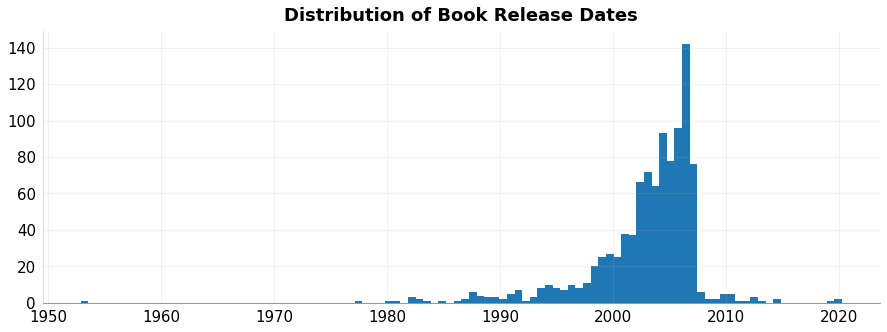

In [12]:
ax=executeQuery("select publication_date::date from books")['publication_date'].hist(bins=100,figsize=(15,5))
modifyChartBasic(ax,'Distribution of Book Release Dates',15,titleSize=18)
plt.grid('both',alpha=.2)

### A large portion of the books in the database were released in the 2000s.

Number of user reviews and the average rating for each book.

In [63]:
tables, aggs, labels = ['ratings','reviews'],['COUNT(*)', 'COUNT(DISTINCT book_id)'],['count','unique count']

In [80]:
[print(table,f'book {label}:',executeQuery(     #table name, aggregate function name
    f'SELECT {agg} FROM {table} GROUP BY book_id').sum()['count']) #sum of SQL count query
 for table,label in zip(tables,labels) for agg in aggs]

ratings book count: 6456
ratings book count: 1000
reviews book unique count: 2793
reviews book unique count: 994


[None, None, None, None]

In [79]:
question2 = executeQuery('''
SELECT NumUserReview.book_id, 
       NumUserReview.review_count, 
       avg_rating 
FROM   (SELECT book_id,    /*--------Number of reviews per unique book----------*/
               Count(*) AS review_count 
        FROM   reviews 
        GROUP  BY book_id) AS NumUserReview 
LEFT JOIN (SELECT book_id,   /*--------Average rating per unique book----------*/
               Avg(rating) AS avg_rating 
           FROM   ratings 
          GROUP  BY book_id) AS rating 
               ON NumUserReview.book_id = rating.book_id 
ORDER  BY review_count DESC; 
             ''')
question2

,book_id,review_count,avg_rating
0,948,7,3.662500
1,656,6,4.264151
2,497,6,4.125000
3,963,6,3.977273
4,696,6,3.830508
...,...,...,...
989,599,1,5.000000
990,187,1,3.000000
991,156,1,4.333333
992,984,1,4.500000


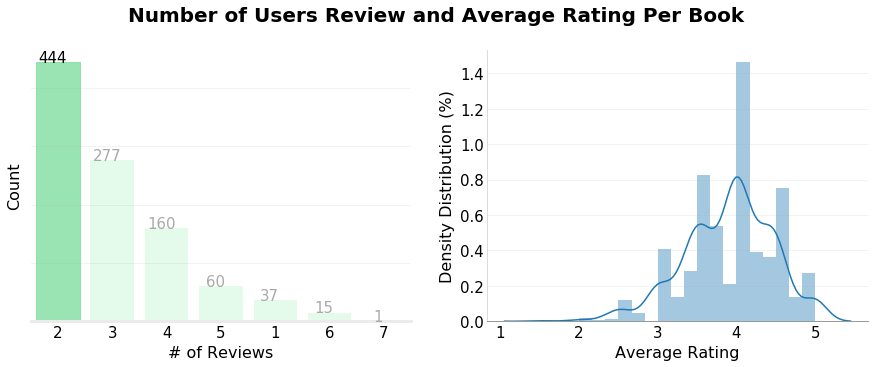

In [68]:
fig, ax= plt.subplots(ncols=2,figsize=(15,5))
sns.countplot(question2['review_count'],
              order =question2['review_count'].value_counts().index,
              color='#9cffbc',alpha=.3,ax=ax[0])
sns.distplot(question2['avg_rating'],ax=ax[1])

Xlabels = '# of Reviews', 'Average Rating'
Ylabels= 'Count',  'Density Distribution (%)'

[modifyChartBasic(ax[i], '' , 13,xLabel=Xlabels[i],yLabel=Ylabels[i]) for i in [0,1]]
[modifyChartExtra(ax[i], topValueColor='#80DE9F', highlightXVal=True if i==0  else False) for i in [0,1]]
[ax[i].grid(axis='y', alpha=.2) for i in range(0,2)]

for rec in  ax[0].patches:
    ax[0].text(rec.get_x()+.3,rec.get_height(), rec.get_height(),
               fontsize=15,color='black' if rec.get_height()>400 else '#A9A9A9', horizontalalignment='center')
ax[0].set_yticklabels([])
ax[0].spines['left'].set_visible(False)
ax[0].spines['bottom'].set_color('#ebebeb') 
ax[0].spines['bottom'].set_linewidth(3)

plt.suptitle("Number of Users Review and Average Rating Per Book",fontsize=20, y=1,fontweight='bold')
plt.show()

### On average, books are reviewed by 2 users and are left with a rating of 4/5.  Books on the aggregate seem to have a favorable rating considering the low % 1-2 ratings. 

- Identify the publisher that has released the greatest number of books with more than 50 pages (this will help you exclude brochuresA and similar publications from your analysis).

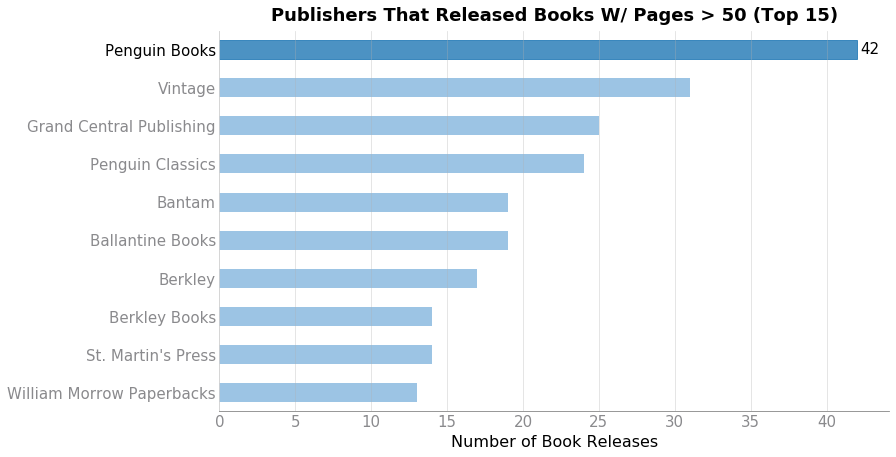

In [71]:
fig, ax= plt.subplots(figsize=(12,7))
(executeQuery('''
SELECT publisher, 
       Count(books.book_id) 
FROM   books 
       INNER JOIN publishers 
               ON books.publisher_id = publishers.publisher_id 
WHERE  num_pages > 50 
GROUP  BY publisher 
ORDER  BY count DESC 
LIMIT  10 
''')
 .set_index('publisher')
 .sort_values('count')
 .plot.barh(ax=ax,color='#9CC4E4',legend=False))

modifyChartBasic(ax, 'Publishers That Released Books W/ Pages > 50 (Top 15)',13,
                 xLabel='Number of Book Releases',titleSize=18)
modifyChartExtra(ax,grid='x',topValueColor='#1f77b4', grayTickLabels=True,
                 topChild=ax.get_children()[9], highlightTop='black')
plt.text(ax.get_children()[9].get_width()+.2, 8.9,
         ax.get_children()[9].get_width(),fontsize=15)

plt.show()

### Penguin books has the most number of book releases (42) for books with > 50 pages. 

- Identify the author with the highest average book rating (look only at books with at least 50 ratings).


In [93]:
executeQuery('''
SELECT author,  /*--------Author and average book rating----------*/
       Avg(rating),
       COUNT(DISTINCT books.book_id) as book_count
FROM   books 
       LEFT JOIN ratings   
               ON books.book_id = ratings.book_id 
       LEFT JOIN authors     
               ON authors.author_id = books.author_id 
WHERE  books.book_id IN (SELECT book_id  /*--------Books > 50 rating count----------*/
                         FROM   ratings 
                         GROUP  BY book_id 
                         HAVING Count(rating) > 49) 
GROUP  BY authors.author 
ORDER  BY Avg(rating) DESC 
LIMIT  5 
''').style.background_gradient(cmap='Greens')

,author,avg,book_count
0,J.K. Rowling/Mary GrandPré,4.2871,4
1,Markus Zusak/Cao Xuân Việt Khương,4.26415,1
2,J.R.R. Tolkien,4.24691,2
3,Louisa May Alcott,4.19231,1
4,Rick Riordan,4.08065,1


### The top 3 authors with the highest average book rating having at least 50 user ratings are: J.K. Rowling/Mary GrandPré, Markus Zusak/Cao Xuân Việt Khương, and J.R.R. Tolkien. 

- Find the average number of text reviews among users who rated more than 50 books.

In [73]:
executeQuery('''
SELECT Avg(count) AS avg_num_text_reviews 
FROM   (SELECT Count(text) 
        FROM   reviews 
        WHERE  username IN (SELECT username 
                            FROM   ratings 
                            GROUP  BY username 
                            HAVING Count(book_id) > 50) 
        GROUP  BY username) AS counts 
''')

,avg_num_text_reviews
0,24.333333


### There are on average roughly 24 number of text reviews among users who rated more than 50 books.